In [174]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [175]:
melb_data = pd.read_csv("c:/Users/Userpc/Desktop/Projects/ML Shortcuts/Linear Regression/melb_data.csv")
melb_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [176]:
melb_data["Date"] = pd.to_datetime(melb_data["Date"], format="%d/%m/%Y")
melb_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-12-03,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-02-04,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-03-04,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,2017-03-04,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-06-04,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [177]:
melb_data["Date"] = melb_data["Date"].dt.year

In [178]:
melb_data.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date               int32
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [179]:
melb_data.shape

(13580, 21)

In [180]:
melb_data.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [181]:
melb_data.select_dtypes(['object']).nunique()

Suburb           314
Address        13378
Type               3
Method             5
SellerG          268
CouncilArea       33
Regionname         8
dtype: int64

In [182]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer

melb_data.dropna(axis=0, inplace=True)

X = melb_data.drop(["Price", "Suburb", "Address", "SellerG", "CouncilArea"], axis=1)
y = melb_data["Price"]

print(X.shape)

categorical_val = ["Type", "Method", "Regionname"]
numerical_val = X.columns.difference(categorical_val)

categorical_transformer = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_val),
        ('cat', categorical_transformer, categorical_val)
    ]
)

pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=0)

pred = pipe.fit(train_X, train_y).predict(test_X)




(6196, 16)


In [183]:
from sklearn.metrics import mean_absolute_error
import numpy as np

absolute_percentage_error = np.abs((test_y - pred) / test_y) * 100

mape = np.mean(absolute_percentage_error)

mape


27.934158203951704

In this approach I will use LinearRegression without preprocessing

In [184]:
melb_data = pd.read_csv("c:/Users/Userpc/Desktop/Projects/ML Shortcuts/Linear Regression/melb_data.csv")
melb_data.shape

(13580, 21)

In [185]:
melb_data["Date"] = pd.to_datetime(melb_data["Date"], format="%d/%m/%Y")
melb_data["Date"] = melb_data["Date"].dt.year
# dropped_melb_data = melb_data.dropna(axis=0)

I will use machine learning imputation, which means I will predict missing values of __building_area__ and then use it to predict prices.

(0.0, 10000000.0)

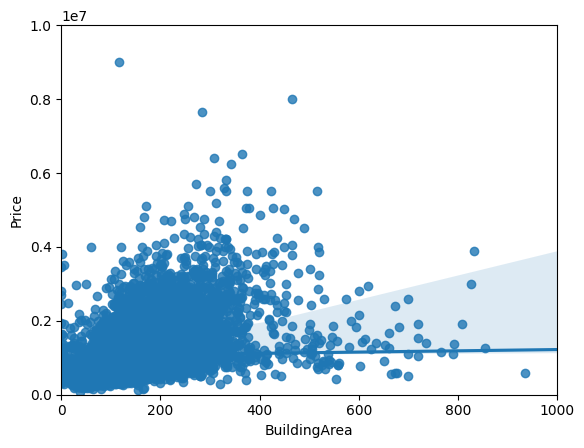

In [186]:
relevant_features = ["Rooms", "Type", "Bedroom2", "Distance", "Postcode", "Bathroom", "Car", "Landsize", "Regionname"]
X_train = melb_data.loc[~melb_data["BuildingArea"].isnull(), relevant_features]
y_train = melb_data.loc[~melb_data["BuildingArea"].isnull(), "BuildingArea"]

X_missing = melb_data.loc[melb_data["BuildingArea"].isnull(), relevant_features]

pipe = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
    ('model', LinearRegression())
])

y_missing_pred = pipe.fit(X_train, y_train).predict(X_missing)

# Now let's fill in the missing values in the original DataFrame
melb_data.loc[melb_data["BuildingArea"].isnull(), "BuildingArea"] = y_missing_pred

# print(melb_data.isnull().sum())

sns.regplot(data=melb_data, x="BuildingArea", y="Price")
plt.xlim(0, 1000)
plt.ylim(0, 10000000)

Now I have to deal with "YearBuilt" missing values. I will use the same approach

In [187]:
relevant_features = ["Rooms", "Method", "Distance", "Postcode", "Bedroom2", "Bathroom", "Car", "Landsize", "BuildingArea", "Regionname"]

X_train = melb_data.loc[~melb_data["YearBuilt"].isnull(), relevant_features]
y_train = melb_data.loc[~melb_data["YearBuilt"].isnull(), "YearBuilt"]

X_missing = melb_data.loc[melb_data["YearBuilt"].isnull(), relevant_features]

pipe = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
    ('model', LinearRegression())
])

y_missing_pred = pipe.fit(X_train, y_train).predict(X_missing)

melb_data.loc[melb_data["YearBuilt"].isnull(), "YearBuilt"] = y_missing_pred

In [195]:
from sklearn.linear_model import Ridge

melb_data = melb_data.dropna(subset=["Car"])

X = melb_data.drop(["Price", "Suburb", "Address", "SellerG", "CouncilArea"], axis=1)
y = melb_data["Price"]

print(X.shape)

categorical_cols = ["Type", "Method", "Regionname"]
numerical_cols = X.columns.difference(categorical_cols)

categorical_transformer = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pred = pipe.fit(X_train, y_train).predict(X_test)

# Применяем метод Ridge (метод наименьших квадратов с L2 регуляризацией)
pipe_ridge = Pipeline([
    ('preprocessor', preprocessor),
    ('model', Ridge(alpha=1.0))
])

pipe_ridge.fit(X_train, y_train)
y_pred = pipe_ridge.predict(X_test)


(13518, 16)


In [189]:
absolute_percentage_error = np.abs((y_test - pred) / y_test) * 100

mape = np.mean(absolute_percentage_error)

mape

27.67606068694708

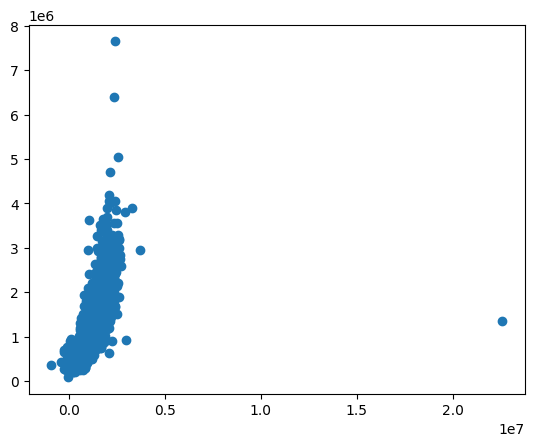

In [198]:
plt.scatter(pred, y_test)

In [196]:
absolute_percentage_error = np.abs((y_test - y_pred) / y_test) * 100

mape = np.mean(absolute_percentage_error)

mape

27.691899052172424

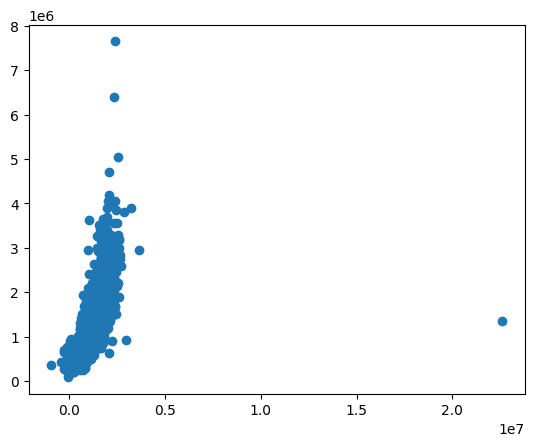

In [197]:
plt.scatter(y_pred, y_test)

In [200]:
from sklearn.linear_model import Lasso

pipe_lasso = Pipeline([
    ('preprocessor', preprocessor),
    ('model', Lasso(alpha=1.0))
])

pipe_lasso.fit(X_train, y_train)
y_pred = pipe_lasso.predict(X_test)

absolute_percentage_error = np.abs((y_test - y_pred) / y_test) * 100

mape = np.mean(absolute_percentage_error)

mape

c:\Users\Userpc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.060e+14, tolerance: 4.236e+11
  model = cd_fast.enet_coordinate_descent(


27.676305963901925